In [102]:

from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb

In [89]:
data = pd.DataFrame.from_csv('../../data/data.csv')

In [90]:
data = data[['period','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]


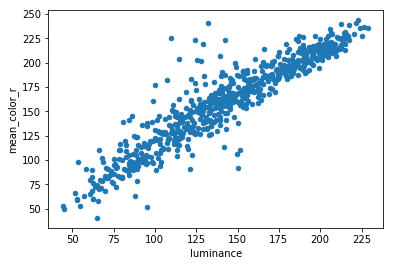

In [91]:
data.plot(kind='scatter', x='luminance', y='mean_color_r')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split

features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['period']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)


In [93]:
pca=PCA(n_components=2)
pca_features = pca.fit_transform(features)


In [94]:
color = {'abstract_expressionist_55_57':'grey', 'early_paintings_34_53': 'orange','stripe_paintings_61_62':'yellow',\
         'themes_variations_59_60':'red','unfurled_paintings_60_61':'blue','veil_paintings_54': 'black',\
         'veil_paintings_58_59': 'green'}
df =pd.DataFrame({'pca_feature_1':[x[0] for x in pca_features],'pca_feature_2':[x[1] for x in pca_features],\
                  'period':list(target.values), 'color': [color[x] for x in list(target.values)]})
df.head()

,color,pca_feature_1,pca_feature_2,period
0,red,63.370229,-5.973138,themes_variations_59_60
1,red,-15.037313,10.406735,themes_variations_59_60
2,red,11.866112,13.614072,themes_variations_59_60
3,red,63.191783,-17.864418,themes_variations_59_60
4,red,16.594070,7.575969,themes_variations_59_60


In [109]:
#df.plot(kind='scatter', x='pca_feature_2', y='pca_feature_1', color=df['color'])
plt.scatter(x=df['pca_feature_2'], y=df['pca_feature_1'], color=df['color'], alpha=.5)


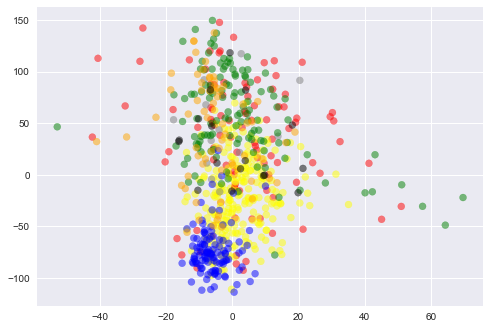

In [110]:
plt.show()